In [1]:
!pip install --quiet mlxtend openpyxl


In [3]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [4]:
from google.colab import files
import pandas as pd

print('If running in Colab, please upload the file when prompted...')
try:
    df = pd.read_excel('Online retail.xlsx', engine='openpyxl')
    print('Loaded from local environment.')
except:
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    df = pd.read_excel(filename, engine='openpyxl')

print('Dataset loaded successfully! Shape:', df.shape)
df.head()

If running in Colab, please upload the file when prompted...
Loaded from local environment.
Dataset loaded successfully! Shape: (7500, 1)


,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [5]:
# Convert each row into a list of items
transactions = []
for i in range(len(df)):
    row = str(df.iloc[i, 0])  # first column contains comma-separated items
    items = [item.strip() for item in row.split(',') if item.strip() != '']
    transactions.append(items)

print('Total transactions:', len(transactions))
print('Example transaction:', transactions[0])

Total transactions: 7500
Example transaction: ['burgers', 'meatballs', 'eggs']


In [6]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
print('Encoded data shape:', df_encoded.shape)
df_encoded.head()

Encoded data shape: (7500, 119)


,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Run Apriori to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
print('Frequent itemsets found:', frequent_itemsets.shape[0])
frequent_itemsets.sort_values('support', ascending=False).head(10)

Frequent itemsets found: 259


,support,itemsets
46,0.238267,(mineral water)
19,0.179733,(eggs)
63,0.174133,(spaghetti)
24,0.170933,(french fries)
13,0.163867,(chocolate)
32,0.132000,(green tea)
45,0.129600,(milk)
33,0.098267,(ground beef)
30,0.095333,(frozen vegetables)
53,0.095067,(pancakes)


In [8]:
# Generate association rules based on lift metric
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules = rules.sort_values(['lift', 'confidence'], ascending=False)
print('Total rules generated:', rules.shape[0])
rules[['antecedents','consequents','support','confidence','lift']].head(15)

Total rules generated: 408


,antecedents,consequents,support,confidence,lift
216,(herb & pepper),(ground beef),0.016000,0.323450,3.291555
217,(ground beef),(herb & pepper),0.016000,0.162822,3.291555
385,"(mineral water, spaghetti)",(ground beef),0.017067,0.285714,2.907540
388,(ground beef),"(mineral water, spaghetti)",0.017067,0.173677,2.907540
396,"(mineral water, spaghetti)",(olive oil),0.010267,0.171875,2.614731
401,(olive oil),"(mineral water, spaghetti)",0.010267,0.156187,2.614731
195,(tomatoes),(frozen vegetables),0.016133,0.235867,2.474134
194,(frozen vegetables),(tomatoes),0.016133,0.169231,2.474134
191,(shrimp),(frozen vegetables),0.016667,0.233645,2.450820
190,(frozen vegetables),(shrimp),0.016667,0.174825,2.450820


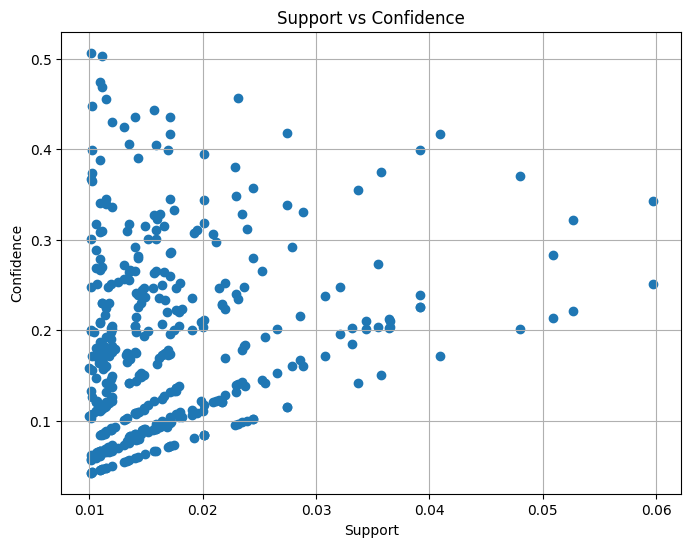

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.grid(True)
plt.show()

In [10]:
rules.head(20).to_csv('Top_Association_Rules.csv', index=False)
print('Top 20 rules saved as Top_Association_Rules.csv')

Top 20 rules saved as Top_Association_Rules.csv


## ✅ Summary
- The dataset was treated as transactional (each row = one basket of items).
- Applied Apriori to discover frequent itemsets.
- Generated and sorted association rules using **support**, **confidence**, and **lift**.
- The top 20 rules are saved as `Top_Association_Rules.csv`.
